# Analysis for salmon trap data in the Dungenesss River from 2005-2014
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2005, the counts for both wild and hatchery are together with an additional column for wild fish. For all other years, counts for wild and hatchery fish are separate.



In [41]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# #read file in Windows
try:
    df_2005 = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name ='2005',
    header = [3,4]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_2005.head()
#columns = list(df)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Chinook 0+,Chinook 1+,Chum,Coho 0+,Coho 1+,Pink,...,Coho 1+ Hatchery ad-mark,Coho 1+ hatchery CWT not ad-marked,Cutthroat parr unmark wild,Cutthroat adult unmark wild,Steelhead parr unmark wild,Steelhead smolt UC mark wild,Steelhead hatchery ad-mark,Steelhead adult unmark wild,Dolly Varden / Bull trout parr unmark wild,Dolly Varden / Bull trout smolt unmark wild
,Down,Up,In,Out,10,11,20,40,41,30,...,41\13,41\30,60\0,62\0,70\0,71\08,71\13,73\0,90\0,91\0
0,2005-03-08 16:30:00,2005-03-09 12:14:00,19.733333,0.000000,86.0,0.0,268.0,0.0,0.0,106.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2005-03-09 12:14:00,2005-03-09 13:06:00,0.000000,0.866667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-09 13:06:00,2005-03-09 18:20:00,5.233333,0.000000,1.0,0.0,30.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-03-09 18:20:00,2005-03-09 20:13:00,1.883333,0.000000,7.0,0.0,165.0,0.0,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-03-09 20:13:00,2005-03-10 08:41:00,12.466667,0.000000,53.0,0.0,599.0,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#if using linux machine:
# df_2005 = pd.read_excel(
#    io="/home/maria/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
#    sheet_name ='2005',
#     header = [3,4]
# )
# df_2005.head()
# df_2005.columns

MultiIndex([(                         'Unnamed: 0_level_0',  'Down'),
            (                         'Unnamed: 1_level_0',    'Up'),
            (                         'Unnamed: 2_level_0',    'In'),
            (                         'Unnamed: 3_level_0',   'Out'),
            (                                 'Chinook 0+',      10),
            (                                 'Chinook 1+',      11),
            (                                       'Chum',      20),
            (                                    'Coho 0+',      40),
            (                                   'Coho 1+ ',      41),
            (                                       'Pink',      30),
            (                                    'Sockeye',      50),
            (                                 'Trout parr',      65),
            (                           'Steelhead smolts',      71),
            (                           'Cutthroat smolts',      61),
            (       

In [43]:
df_2005.columns = df_2005.columns.droplevel(level=1)
df_2005.rename(columns = {
    'Unnamed: 0_level_0':'Down',
    'Unnamed: 1_level_0':'Up',
    'Unnamed: 2_level_0':'In',
    'Unnamed: 3_level_0':'Out',
    'Coho 1+ ':'Coho 1+'
}, inplace = True)
df_2005['Date'] = df_2005['Down'].dt.date
groupedby_dates_2005 = df_2005.groupby(by=["Date"]).sum()

In [131]:
#Chinook 
df_2005['Chinook 1+ per hour'] = df_2005['Chinook 1+'].div(df_2005['In'].values)
df_2005['Chinook 1+ CWT hatchery per hour'] = df_2005['Chinook 1+ CWT hatchery'].div(df_2005['In'].values)
A = df_2005['Chinook 1+ CWT hatchery per hour']
A[np.isnan(A)] = 0
df_2005['Chinook 1+ CWT hatchery per hour edited'] = A
df_2005['Chinook 1+ wild per hour'] = df_2005['Chinook 1+ per hour'] - df_2005['Chinook 1+ CWT hatchery per hour edited']
df_2005['Chinook 0+ per hour'] = df_2005['Chinook 0+'].div(df_2005['In'].values)

#Coho
df_2005['Coho 1+ per hour'] = df_2005['Coho 1+'].div(df_2005['In'].values)
df_2005['Coho 1+ UC mark Wild per hour'] = df_2005['Coho 1+ UC mark Wild'].div(df_2005['In'].values)
df_2005['Coho 1+ LC mark Wild per hour'] = df_2005['Coho 1+ LC mark Wild'].div(df_2005['In'].values)
df_2005['Coho 1+ Wild per hour'] = np.nansum([df_2005['Coho 1+ UC mark Wild per hour'],df_2005['Coho 1+ LC mark Wild per hour']], axis = 0)


df_2005['Coho 1+ Hatchery ad-mark per hour'] = df_2005['Coho 1+ Hatchery ad-mark'].div(df_2005['In'].values)
df_2005['Coho 1+ hatchery CWT not ad-marked per hour'] = df_2005['Coho 1+ hatchery CWT not ad-marked'].div(df_2005['In'].values)
df_2005['Coho 1+ Hatchery per hour'] = np.nansum([df_2005['Coho 1+ Hatchery ad-mark per hour'],df_2005['Coho 1+ hatchery CWT not ad-marked per hour']], axis = 0)


#Steelhead

df_2005['Steelhead smolts per hour'] = df_2005['Steelhead smolts'].div(df_2005['In'].values)
df_2005['Steelhead smolt wild per hour'] = df_2005['Steelhead smolt UC mark wild'].div(df_2005['In'].values)
df_2005['Steelhead hatchery per hour'] = df_2005['Steelhead hatchery ad-mark'].div(df_2005['In'].values)
df_2005['Steelhead parr per hour'] = df_2005['Steelhead parr unmark wild'].div(df_2005['In'].values)


<ipython-input-131-38b1a0c9afe1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A[np.isnan(A)] = 0
/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


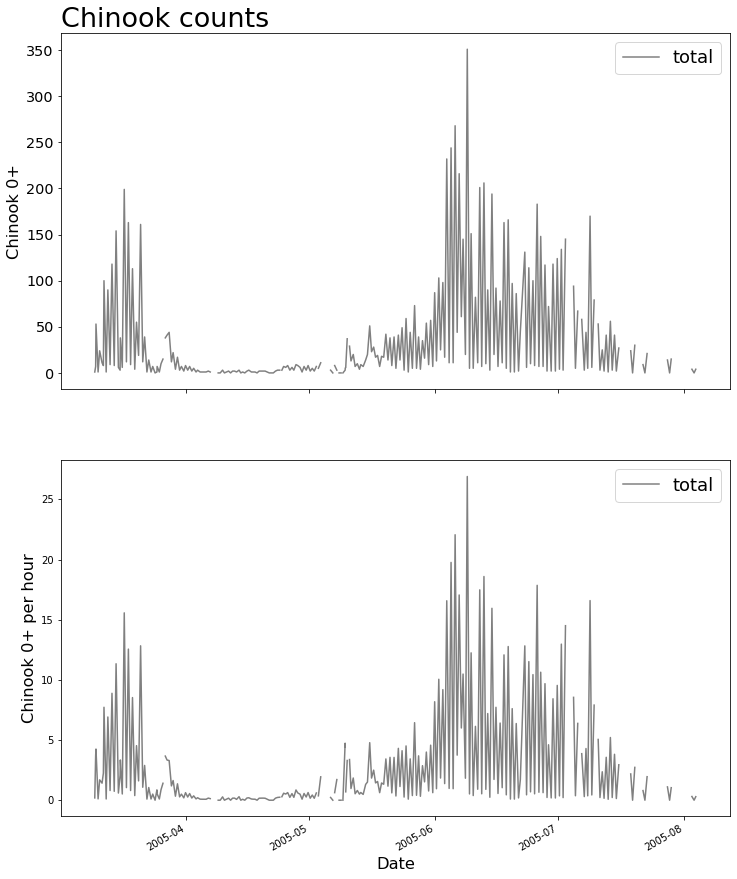

In [14]:
fs = 18
lw = 1.25
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(211)
ax.plot(df_2005['Down'], df_2005['Chinook 0+'], color = 'gray', label = 'total')
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 0+', size = 0.9*fs)
ax.tick_params(labelsize=.8*fs)
ax.set_title('Chinook counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

ax1 = fig.add_subplot(212)
ax1.plot(df_2005['Down'], df_2005['Chinook 0+ per hour'], color = 'gray', label = 'total')
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 0+ per hour', size = 0.9*fs)
ax.tick_params(labelsize=.8*fs)
ax.set_title('Chinook counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

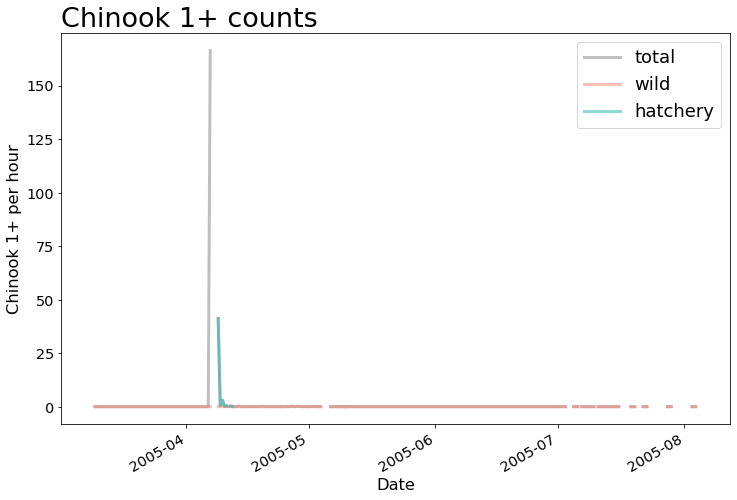

In [69]:
fs = 18
lw = 1.25
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(
    df_2005['Down'], df_2005['Chinook 1+ per hour'], 
    linewidth = 3, label = 'total', color = 'gray', alpha = transparency)
ax.plot(
    df_2005['Down'], df_2005['Chinook 1+ wild per hour'], 
    linewidth = 3, label = 'wild', color = 'salmon', alpha = transparency)

ax.plot(
    df_2005['Down'], df_2005['Chinook 1+ CWT hatchery per hour'], 
    linewidth = 3, label  = 'hatchery', color = 'lightseagreen', alpha = transparency)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 1+ per hour', size = 0.9*fs)
ax.tick_params(labelsize=.8*fs)
ax.set_title('Chinook 1+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')


plt.show()

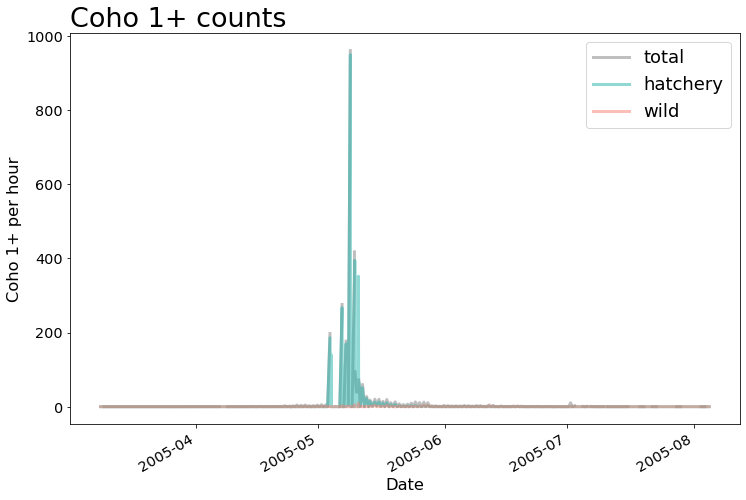

In [71]:
fs = 18
lw = 1.25
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(
    df_2005['Down'], df_2005['Coho 1+ per hour'], 
    linewidth = 3, label = 'total', color = 'gray', alpha = transparency)


ax.plot(
    df_2005['Down'], df_2005['Coho 1+ Hatchery per hour'], 
    linewidth = 3, label  = 'hatchery', color = 'lightseagreen', alpha = transparency)


ax.plot(
    df_2005['Down'], df_2005['Coho 1+ Wild per hour'], 
    linewidth = 3, label = 'wild', color = 'salmon', alpha = transparency)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Coho 1+ per hour', size = 0.9*fs)
ax.tick_params(labelsize=.8*fs)
ax.set_title('Coho 1+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')


plt.show()



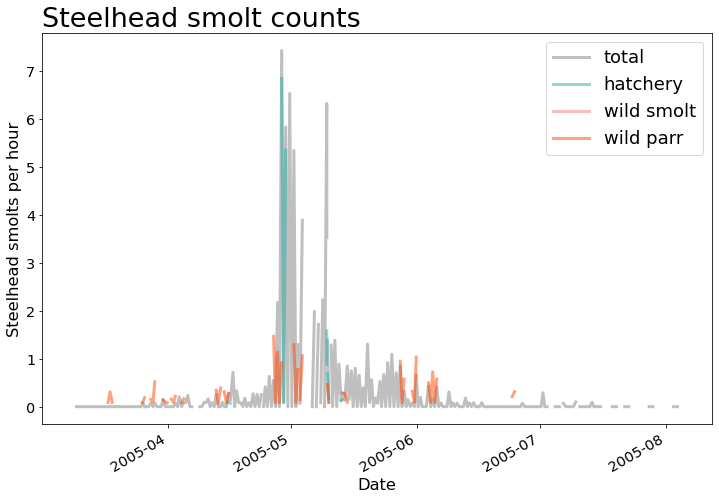

In [80]:
fs = 18
lw = 1.25
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(
    df_2005['Down'], df_2005['Steelhead smolts per hour'], 
    linewidth = 3, label = 'total', color = 'gray', alpha = transparency)


ax.plot(
    df_2005['Down'], df_2005['Steelhead hatchery per hour'], 
    linewidth = 3, label  = 'hatchery', color = 'lightseagreen', alpha = transparency)


ax.plot(
    df_2005['Down'], df_2005['Steelhead smolt wild per hour'], 
    linewidth = 3, label = 'wild smolt', color = 'salmon', alpha = transparency)

ax.plot(
    df_2005['Down'], df_2005['Steelhead parr per hour'], 
    linewidth = 3, label = 'wild parr', color = 'orangered', alpha = transparency)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Steelhead smolts per hour', size = 0.9*fs)
ax.tick_params(labelsize=.8*fs)
ax.set_title('Steelhead smolt counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')


plt.show()


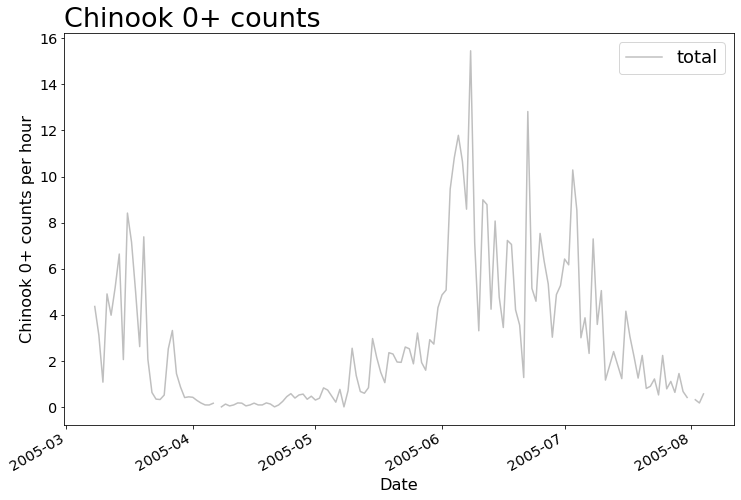

In [49]:
#Chinook 
groupedby_dates_2005['chinook1_perhour'] = groupedby_dates_2005['Chinook 1+']/groupedby_dates_2005['In']
groupedby_dates_2005['chinook1_hatchery_perhour'] = groupedby_dates_2005['Chinook 1+ CWT hatchery']/groupedby_dates_2005['In']
groupedby_dates_2005['chinook1_wild_perhour'] = groupedby_dates_2005['chinook1_perhour'] - groupedby_dates_2005['chinook1_hatchery_perhour']

#chinook 0
groupedby_dates_2005['chinook0_perhour'] = groupedby_dates_2005['Chinook 0+']/groupedby_dates_2005['In']



fs = 18
lw = 1.25
tranparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(groupedby_dates_2005.index, groupedby_dates_2005['chinook0_perhour'], color = 'gray', label = 'total', alpha = 0.5)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 0+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook 0+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


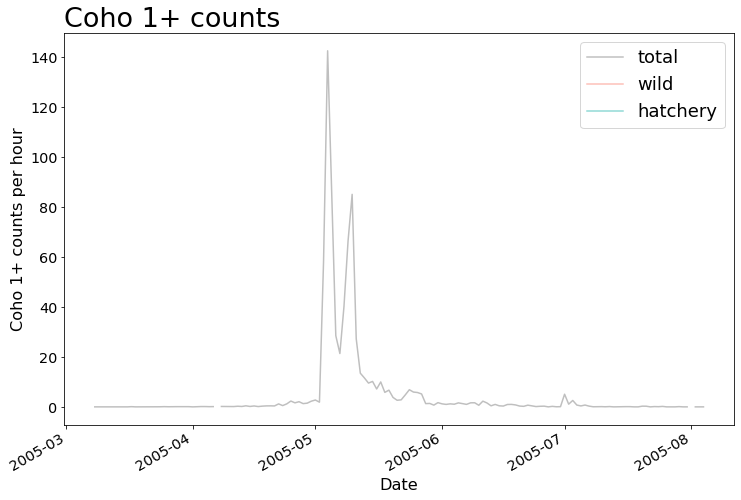

In [52]:
#Coho
groupedby_dates_2005['coho1_perhour'] = groupedby_dates_2005['Coho 1+']/groupedby_dates_2005['In']
groupedby_dates_2005['Coho 1+ UC mark Wild per hour'] = groupedby_dates_2005['Coho 1+ UC mark Wild']/df_2005['In']
groupedby_dates_2005['Coho 1+ LC mark Wild per hour'] = groupedby_dates_2005['Coho 1+ LC mark Wild']/df_2005['In']
groupedby_dates_2005['coho1_wild_perhour'] = groupedby_dates_2005['Coho 1+ UC mark Wild per hour'] + groupedby_dates_2005['Coho 1+ LC mark Wild per hour']

#something is wrong!!
groupedby_dates_2005['Coho 1+ Hatchery ad-mark per hour'] = groupedby_dates_2005['Coho 1+ Hatchery ad-mark']/df_2005['In']
groupedby_dates_2005['Coho 1+ hatchery CWT not ad-marked per hour'] = groupedby_dates_2005['Coho 1+ hatchery CWT not ad-marked']/df_2005['In']
groupedby_dates_2005['coho1_hatchery_perhour'] = groupedby_dates_2005['Coho 1+ Hatchery ad-mark per hour'] + groupedby_dates_2005['Coho 1+ hatchery CWT not ad-marked per hour']

plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(groupedby_dates_2005.index, groupedby_dates_2005['coho1_perhour'], color = 'gray', label = 'total', alpha = 0.5)

ax1.plot(groupedby_dates_2005.index, groupedby_dates_2005['coho1_wild_perhour'], color = 'salmon', label = 'wild', alpha = 0.5)

ax1.plot(groupedby_dates_2005.index, groupedby_dates_2005['coho1_hatchery_perhour'], color = 'lightseagreen', label = 'hatchery', alpha = 0.5)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Coho 1+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Coho 1+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


In [34]:
test = [[1,2,3],[1,2,3],[1,2,np.nan]]
df_test = pd.DataFrame(test)

df_test.columns = ["a","b","c"]
print(df_test)
df_test.groupby(by = "b").sum()


   a  b    c
0  1  2  3.0
1  1  2  3.0
2  1  2  NaN


,a,c
b,,
2,3,6.0


In [57]:


groupedby_dates_2005['Coho 1+ Hatchery ad-mark'].sum()

7845.0